<a href="https://colab.research.google.com/github/rocket0l4/kag-cont/blob/main/kag1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using of Ensemble learning

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.drop(['Name','Sex','Pclass','Ticket','SibSp','Fare','Cabin','Embarked','Parch'],axis=1)

In [ ]:
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
886,887,0,27.0
887,888,1,19.0
888,889,0,NaN
889,890,1,26.0


In [ ]:
df1 = df.fillna(df.mean().round(2))
df1

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
886,887,0,27.0
887,888,1,19.0
888,889,0,29.7
889,890,1,26.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [ ]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Age,0


In [ ]:
import seaborn as sns

<Axes: xlabel='PassengerId', ylabel='Age'>

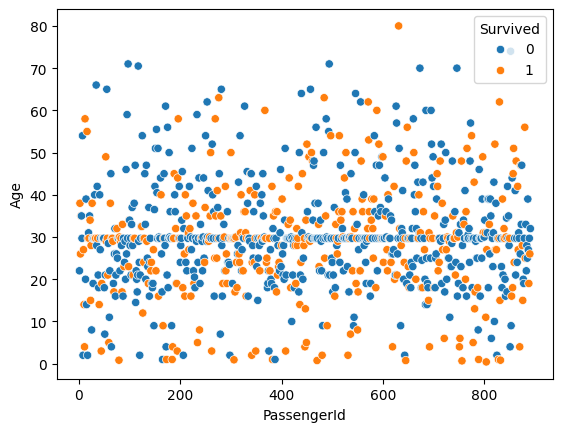

In [ ]:
sns.scatterplot(x=df1['PassengerId'],y=df1['Age'],hue=df1['Survived'])

In [ ]:
df1['weights'] = 1/df.shape[0]

In [ ]:
df1 = df1.reindex(columns = ['PassengerId','Age','Survived','weights'])
df1

,PassengerId,Age,Survived,weights
0,1,22.0,0,0.001122
1,2,38.0,1,0.001122
2,3,26.0,1,0.001122
3,4,35.0,1,0.001122
4,5,35.0,0,0.001122
...,...,...,...,...
886,887,27.0,0,0.001122
887,888,19.0,1,0.001122
888,889,29.7,0,0.001122
889,890,26.0,1,0.001122


In [ ]:
df1.info

<bound method DataFrame.info of      PassengerId   Age  Survived   weights
0              1  22.0         0  0.001122
1              2  38.0         1  0.001122
2              3  26.0         1  0.001122
3              4  35.0         1  0.001122
4              5  35.0         0  0.001122
..           ...   ...       ...       ...
886          887  27.0         0  0.001122
887          888  19.0         1  0.001122
888          889  29.7         0  0.001122
889          890  26.0         1  0.001122
890          891  32.0         0  0.001122

[891 rows x 4 columns]>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [ ]:
X = df1.iloc[:,0:2].values
y = df1.iloc[:,2].values

In [ ]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.25, 'gini = 0.418\nsamples = 47\nvalue = [14, 33]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.464\nsamples = 844\nvalue = [535, 309]'),
 Text(0.625, 0.5, '  False')]

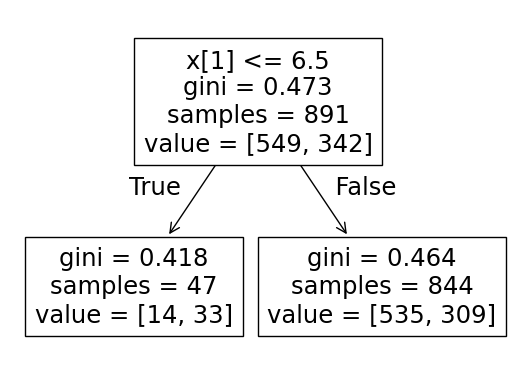

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

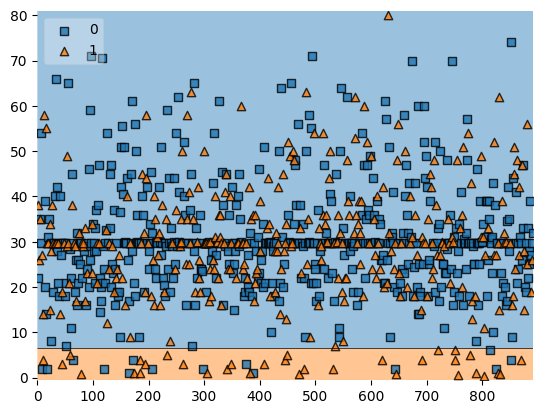

In [ ]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [ ]:
df1['y_pred']  = dt1.predict(X)

In [ ]:
def calulate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [ ]:
alpha1 = calulate_model_weight(0.3)
alpha1

0.42364893019360184

In [ ]:
def update_row_weights(row,alpha=0.423):
  if row['Survived'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [ ]:
df1['updated_weights'] = df1.apply(update_row_weights,axis=1)

In [ ]:
df1

,PassengerId,Age,Survived,weights,y_pred,updated_weights
0,1,22.0,0,0.001122,0,0.000735
1,2,38.0,1,0.001122,0,0.001713
2,3,26.0,1,0.001122,0,0.001713
3,4,35.0,1,0.001122,0,0.001713
4,5,35.0,0,0.001122,0,0.000735
...,...,...,...,...,...,...
886,887,27.0,0,0.001122,0,0.000735
887,888,19.0,1,0.001122,0,0.001713
888,889,29.7,0,0.001122,0,0.000735
889,890,26.0,1,0.001122,0,0.001713


In [ ]:
df1['updated_weights'].sum()

0.9709935367055795

In [ ]:
df1['normalized_weights'] = df1['updated_weights']/df1['updated_weights'].sum()

In [ ]:
df1

,PassengerId,Age,Survived,weights,y_pred,updated_weights,normalized_weights
0,1,22.0,0,0.001122,0,0.000735,0.000757
1,2,38.0,1,0.001122,0,0.001713,0.001764
2,3,26.0,1,0.001122,0,0.001713,0.001764
3,4,35.0,1,0.001122,0,0.001713,0.001764
4,5,35.0,0,0.001122,0,0.000735,0.000757
...,...,...,...,...,...,...,...
886,887,27.0,0,0.001122,0,0.000735,0.000757
887,888,19.0,1,0.001122,0,0.001713,0.001764
888,889,29.7,0,0.001122,0,0.000735,0.000757
889,890,26.0,1,0.001122,0,0.001713,0.001764


In [ ]:
df1['normalized_weights'].sum()

1.0000000000000004

In [ ]:
df1['cumsum_upper'] = np.cumsum(df1['normalized_weights'])

In [ ]:
df1['cumsum_lower'] = df1['cumsum_upper'] - df1['normalized_weights']

In [ ]:
df1

,PassengerId,Age,Survived,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,22.0,0,0.001122,0,0.000735,0.000757,0.000757,0.000000
1,2,38.0,1,0.001122,0,0.001713,0.001764,0.002522,0.000757
2,3,26.0,1,0.001122,0,0.001713,0.001764,0.004286,0.002522
3,4,35.0,1,0.001122,0,0.001713,0.001764,0.006051,0.004286
4,5,35.0,0,0.001122,0,0.000735,0.000757,0.006808,0.006051
...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0.001122,0,0.000735,0.000757,0.994957,0.994200
887,888,19.0,1,0.001122,0,0.001713,0.001764,0.996721,0.994957
888,889,29.7,0,0.001122,0,0.000735,0.000757,0.997478,0.996721
889,890,26.0,1,0.001122,0,0.001713,0.001764,0.999243,0.997478


In [ ]:
df1[['PassengerId', 	'Age', 	'Survived', 	'weights', 	'y_pred', 	'updated_weights',  	'cumsum_lower', 	'cumsum_upper']]

,PassengerId,Age,Survived,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,22.0,0,0.001122,0,0.000735,0.000000,0.000757
1,2,38.0,1,0.001122,0,0.001713,0.000757,0.002522
2,3,26.0,1,0.001122,0,0.001713,0.002522,0.004286
3,4,35.0,1,0.001122,0,0.001713,0.004286,0.006051
4,5,35.0,0,0.001122,0,0.000735,0.006051,0.006808
...,...,...,...,...,...,...,...,...
886,887,27.0,0,0.001122,0,0.000735,0.994200,0.994957
887,888,19.0,1,0.001122,0,0.001713,0.994957,0.996721
888,889,29.7,0,0.001122,0,0.000735,0.996721,0.997478
889,890,26.0,1,0.001122,0,0.001713,0.997478,0.999243
